<a href="https://colab.research.google.com/github/Leila828/DeepLearning_projects/blob/master/neural_network_xor_logic_from_scratch_vs_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
a = np.array([0, 0, 1, 1])
b = np.array([0, 1, 0, 1])

# y_and = np.array([[0, 0, 0, 1]])
y_xor = np.array([[0,1,1,0]])

In [6]:
total_input = []

total_input = [a, b]
    
total_input = np.array(total_input)

In [15]:
print(total_input)
print(total_input[0])
print(total_input.shape)
total_input.shape[1]

[[0 0 1 1]
 [0 1 0 1]]
[0 0 1 1]
(2, 4)


4

In [16]:
# Define the sigmoid activation function:
def sigmoid (x):
    return 1/(1 + np.exp(-x))

# Define the number of neurons
input_neurons, hidden_neurons, output_neurons = 2, 2, 1

# Total training examples
samples = total_input.shape[1]

# Learning rate
lr = 0.1

# Define random seed to replicate the outputs
np.random.seed(42)

In [17]:
# Initializing the weights for hidden and output layers

w1 = np.random.rand(hidden_neurons, input_neurons)
w2 = np.random.rand(output_neurons, hidden_neurons)

In [18]:
print(w1, w2)

[[0.37454012 0.95071431]
 [0.73199394 0.59865848]] [[0.15601864 0.15599452]]


In [19]:
# Forward propagation
def forward_prop(w1, w2, x):
    z1 = np.dot(w1, x)
    a1 = sigmoid(z1)    
    z2 = np.dot(w2, a1)
    a2 = sigmoid(z2)
    return z1, a1, z2, a2

# Backward propagation
def back_prop(m, w1, w2, z1, a1, z2, a2, y):
    
    dz2 = a2-y
    dw2 = np.dot(dz2, a1.T)/m
    dz1 = np.dot(w2.T, dz2) * a1*(1-a1)
    dw1 = np.dot(dz1, total_input.T)/m
    dw1 = np.reshape(dw1, w1.shape)
    
    dw2 = np.reshape(dw2,w2.shape)    
    return dz2,dw2,dz1,dw1

Text(0, 0.5, 'Loss value')

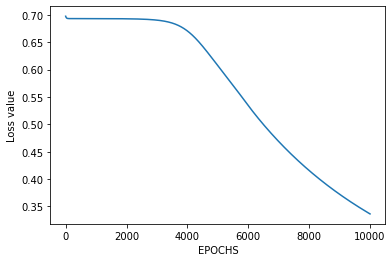

In [20]:
losses = []
iterations = 10000

for i in range(iterations):
    z1, a1, z2, a2 = forward_prop(w1, w2, total_input)
    loss = -(1/samples)*np.sum(y_xor*np.log(a2)+(1-y_xor)*np.log(1-a2))
    losses.append(loss)
    da2, dw2, dz1, dw1 = back_prop(samples, w1, w2, z1, a1, z2, a2, y_xor)
    w2 = w2-lr*dw2
    w1 = w1-lr*dw1

# We plot losses to see how our network is doing
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")

In [21]:
# Creating the predict function

def predict(w1,w2,input):
    z1, a1, z2, a2 = forward_prop(w1,w2,test)
    a2 = np.squeeze(a2)
    
    if a2>=0.5:
        print("For input", [i[0] for i in input], "output is 1")
    else:
        print("For input", [i[0] for i in input], "output is 0")

In [22]:
test = np.array([[0],[0]])
predict(w1,w2,test)

test = np.array([[0],[1]])
predict(w1,w2,test)

test = np.array([[1],[0]])
predict(w1,w2,test)

test = np.array([[1],[1]])
predict(w1,w2,test)

For input [0, 0] output is 0
For input [0, 1] output is 1
For input [1, 0] output is 1
For input [1, 1] output is 0


Using Keras

[[0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]] (8, 2)
[[0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]] (8, 1)
Epoch 1/50
2/2 [==============================] - 1s 161ms/step - loss: 0.7144 - accuracy: 0.7500 - val_loss: 0.6955 - val_accuracy: 0.7500
Epoch 2/50
2/2 [==============================] - 0s 26ms/step - loss: 0.7010 - accuracy: 0.3750 - val_loss: 0.6935 - val_accuracy: 0.2500
Epoch 3/50
2/2 [==============================] - 0s 31ms/step - loss: 0.7091 - accuracy: 0.2500 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 4/50
2/2 [==============================] - 0s 25ms/step - loss: 0.6987 - accuracy: 0.5000 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 5/50
2/2 [==============================] - 0s 55ms/step - loss: 0.6970 - accuracy: 0.2500 - val_loss: 0.6915 - val_accuracy: 0.2500
Epoch 6/50
2/2 [==============================] - 0s 29ms/step - loss: 0.6924 - accuracy: 0.2500 - val_loss: 0.6908 - val_accuracy: 0.2500
Epoch 7/50
2/2 [==============================] - 0s 

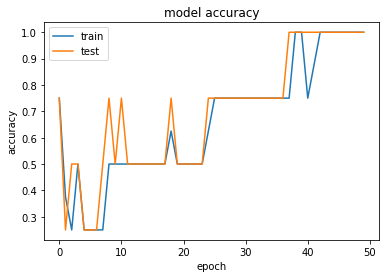

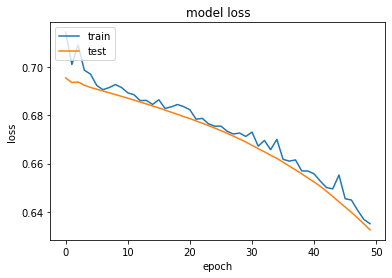

In [30]:
import numpy as np
import tensorflow as tf
import keras
from keras import optimizers
from keras import regularizers
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Activation, Flatten
import matplotlib.pyplot as plt

X = np.array([[0,0],[1,0],[0,1],[1,1],[0,1],[1,1],[0,0],[1,0]])
print(X, X.shape)
y = np.array([[0],[1],[1],[0],[1],[0],[0],[1]])
print(y,y.shape)
test_X = np.array([[1,1],[0,0],[0,1],[1,0]])
test_y = np.array([[0],[0],[1],[1]])
model = tf.keras.models.Sequential()
model.add(Dense(20,input_dim=(2)))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer = optimizers.Adam(lr=0.01))
history = model.fit(X,y,batch_size = 4, epochs=50, validation_data = (test_X,test_y), shuffle=True)

#value= model.predict(np.array([[0,0]])).round()
value= model.predict(np.array([[0,0]]))
classes_x=(value > 0.5).astype("int32")
#np.argmax(model.predict(x_test),axis=1)
print("Output of XOR is %s" %(classes_x[0]))
value= model.predict(np.array([[1,0]]))
classes_x=(value > 0.5).astype("int32")
print("Output of XOR is %s" %(classes_x[0]))
value= model.predict(np.array([[0,1]]))
print("Output of XOR is %s" %(value[0]))
value= model.predict(np.array([[1,1]]))
print("Output of XOR is %s" %(value[0]))
      
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

https://blog.paperspace.com/constructing-neural-networks-from-scratch/